# **Importing libraries and downloading dataset**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d yashpalsorout/random-jet-plane

  0% 0.00/486k [00:00<?, ?B/s]
100% 486k/486k [00:00<00:00, 33.1MB/s]


In [ ]:
!unzip "*.zip"

Archive:  random-jet-plane.zip
  inflating: test/F16_1.jpg          
  inflating: test/F16_10.jpg         
  inflating: test/F16_2.jpg          
  inflating: test/F16_3.jpg          
  inflating: test/F16_4.jpg          
  inflating: test/F16_5.jpg          
  inflating: test/F16_6.jpg          
  inflating: test/F16_7.jpg          
  inflating: test/F16_8.jpg          
  inflating: test/F16_9.jpg          
  inflating: test/F22_1.jpg          
  inflating: test/F22_10.jpg         
  inflating: test/F22_2.jpg          
  inflating: test/F22_3.jpg          
  inflating: test/F22_4.jpg          
  inflating: test/F22_5.jpg          
  inflating: test/F22_6.jpg          
  inflating: test/F22_7.jpg          
  inflating: test/F22_8.jpg          
  inflating: test/F22_9.jpg          
  inflating: test/MIG_1.jpg          
  inflating: test/MIG_10.jpg         
  inflating: test/MIG_2.jpg          
  inflating: test/MIG_3.jpg          
  inflating: test/MIG_4.jpg          
  inflating: test/M

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
model=load_learner("/content/drive/My Drive/project")

# **Prediction and Making Video**

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=model.predict(test_img)
  return pred_class

In [ ]:
all_test_images=os.listdir("/content/test")

f22raptor


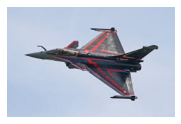

In [ ]:
idx=19
print(my_predictor("/content/test/"+all_test_images[idx]))
img = open_image("/content/test/"+all_test_images[idx])
img.show()

In [1]:
import cv2
test_files=os.listdir("/content/test")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

NameError: ignored

In [ ]:
import os
os.makedirs("image_data",exist_ok=True)
def plots_f(rows, cols, width, height, **kwargs):
  total_plots=plt.subplots(rows,cols,figsize=(width,height))[1].flatten()
  for i,ax in enumerate(total_plots):
    get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax)
    plt.savefig("image_data/"+str(img_counter[0])+".jpg")
    img_counter[0]+=1

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 360x360  \-c:v libx264 -r 0.25 -pix_fmt yuv422p ../jetplane.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [ ]:
!pip install -U kora
from kora.drive import upload_public

     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 


In [ ]:
url = upload_public('jetplane.mp4')
url

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=1000 controls/>""")